# Análise de dados projeto Air BNB Rio de Janeiro :

-Definicão : Airbnb é um serviço que permite que pessoas do mundo inteiro ofereçam suas casas para usuários que buscam acomodações mais em conta em qualquer lugar do mundo. No site Airbnb, é possível oferecer um apenas um quarto ou a casa completa a outros usuários, como também alugar um espaço, caso seja a sua necessidade ou interesse. (fonte: https://www.techtudo.com.br/noticias/2017/01/o-que-e-airbnb.ghtml)


-Esse projeto tem por finalidade construir um modelo de previsão para o preço de um aluguel de um imóvel, no Rio de Janeiro pelo Airbnb, apresentando as principais caracteristicas que interferem diretamente no seu valor. 

# Importar bibliotecas

In [1]:
import pandas as pd #Diversas funcionalidades para trabalhar o data frame 
import pathlib # Percorrer arquivos de uma pasta
import numpy as np #auxilio em calculos matematicos
import matplotlib.pyplot as plt #plotagem de graficos 
import seaborn as sns #plotagem de graficos 
from jupyterthemes import jtplot
import plotly.express as px
jtplot.style(theme='monokai')

#bibliotecas para previsão de modelos 
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# Importar bancos de dados
Como o banco de dados era muito grande e com diversos arquivos, foi utilizado a biblioteca para percorrer todos arquivos da pasta no computador e adicionar em um data frame 

In [2]:
# criar um dicionario para inserir os meses e anos 
meses = {'jan': 1, 'fev' : 2, 'mar' : 3,'abr' : 4,'mai' : 5,'jun' : 6,'jul' : 7,'ago': 8,'set': 9, 'out': 10, 'nov': 11, 'dez':
         
         12}
caminho = pathlib.Path('dataset') # pasta onde esta o arquivo 

base = pd.DataFrame()

for c in caminho.iterdir():# Lista com todos arquivos usando o iterdir da biblioteca pathlib!!!
    
    nome_meses = c.name[:3] # Irá percorrer a pasta com os arquivos e pegar os 3 primeiros caracteres
    mes = meses[nome_meses] # pegar o mês e colocar em uma coluna 
    
    ano = c.name[-8:-4] # pegar o ano e colocar em uma coluna 

    print(c.name)
    
    df = pd.read_csv(caminho / c.name)
    df['mes'] = mes #inserir mes no data frame 
    df['ano'] = ano # inserir ano no data frame
    base = base.append(df)
    


abril2018.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


abril2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


abril2020.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


agosto2018.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


agosto2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


dezembro2018.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


dezembro2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


fevereiro2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


fevereiro2020.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


janeiro2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


janeiro2020.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


julho2018.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


julho2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


junho2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


maio2018.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


maio2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


maio2020.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


maro2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


maro2020.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


novembro2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


novrmbro2018.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


outubro2018.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


outubro2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


setembro2018.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


setembro2019.csv


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:18: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho / c.name)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\1653651000.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append(df)


# Exibir os dados para uma análise superficial   (display  e info)

In [3]:
display(base)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,38844730,https://www.airbnb.com/rooms/38844730,20190923212307,2019-09-24,TRANSAMERICA BARRA DA TIJUCA R IV,"Em estilo contemporâneo, o Transamerica Prime ...",NaN,"Em estilo contemporâneo, o Transamerica Prime ...",none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,15.0,0.0,0.0
34325,38846408,https://www.airbnb.com/rooms/38846408,20190923212307,2019-09-24,Alugo para o Rock in Rio,"Confortável apartamento, 2 quartos , sendo 1 s...",O apartamento estará com mobília completa disp...,"Confortável apartamento, 2 quartos , sendo 1 s...",none,"Muito próximo ao Parque Olímpico, local do eve...",...,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,1.0,0.0,0.0
34326,38846703,https://www.airbnb.com/rooms/38846703,20190923212307,2019-09-24,Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA,Apartamento quarto e sala COMPLETO para curtas...,Espaço ideal para até 5 pessoas. Cama de casal...,Apartamento quarto e sala COMPLETO para curtas...,none,NaN,...,3.0,3.0,1125.0,1125.0,3.0,1125.0,0.0,23.0,6.0,0.0
34327,38847050,https://www.airbnb.com/rooms/38847050,20190923212307,2019-09-24,Cobertura Cinematografica,Cobertura alto nivel,NaN,Cobertura alto nivel,none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,1.0,0.0,0.0


In [4]:

base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902210 entries, 0 to 34328
Columns: 108 entries, id to calculated_host_listings_count_shared_rooms
dtypes: float64(31), int64(14), object(63)
memory usage: 750.3+ MB


# Tratamento dos dados 
- Eliminar colunas que não serão uteis 
- Tratar dados nulos
- Tipos de dados (int, float, str, etc)

In [5]:
# Foi gereado um arquivo excel com todas as colunas para conseguir ter uma visão do  
# documento e se a  principio alguma coluna não teria necessidade de estar na analise 
base.head(500).to_csv('primeiros_registros.csv',sep = ';')

In [6]:
colunas=['host_identity_verified','neighbourhood','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','mes','ano']
base= base.loc[:,colunas]
display(base)

,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,mes,ano
0,t,Botafogo,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,0.0,2.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,4,2018
1,f,Copacabana,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,4,2018
2,t,Ipanema,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,4,2018
3,t,Copacabana,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,4,2018
4,t,Ipanema,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,f,Barra da Tijuca,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,9,2019
34325,f,Barra da Tijuca,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,9,2019
34326,t,Copacabana,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,9,2019
34327,t,Barra da Tijuca,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,9,2019


### Eliminar valores nulos 

In [7]:
# valores nulos 

# exluir colunas com muitos valores Nan
for c in base:
    if base[c].isnull().sum() > 300000:
        base = base.drop(c,axis= 1)
# excluir linhas nulas 
base = base.dropna()
print(base.isnull().sum())        

host_identity_verified      0
neighbourhood               0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
mes                         0
ano                         0
dtype: int64


### Configurandos caracteres 

In [8]:
# Mostra cada coluna  e seu tipo
c1= 0    
for c1 in base:
    
    print(c1)
    print(base[c1].head(1))
    print('-------------------------------------------')

host_identity_verified
0    t
Name: host_identity_verified, dtype: object
-------------------------------------------
neighbourhood
0    Botafogo
Name: neighbourhood, dtype: object
-------------------------------------------
latitude
0   -22.946854
Name: latitude, dtype: float64
-------------------------------------------
longitude
0   -43.182737
Name: longitude, dtype: float64
-------------------------------------------
property_type
0    Apartment
Name: property_type, dtype: object
-------------------------------------------
room_type
0    Entire home/apt
Name: room_type, dtype: object
-------------------------------------------
accommodates
0    4
Name: accommodates, dtype: int64
-------------------------------------------
bathrooms
0    1.0
Name: bathrooms, dtype: float64
-------------------------------------------
bedrooms
0    0.0
Name: bedrooms, dtype: float64
-------------------------------------------
beds
0    2.0
Name: beds, dtype: float64
-----------------------------------

In [9]:

# price = object, tirar a virgula e o sifrao do separador
base['price'] = base['price'].str.replace('$','')
base['price'] = base['price'].str.replace(',','')
base['price'] = base['price'].astype(np.float32)# transformar em float

# extra_people = object  ,tirar a virgula e o sifrao do separador

base['extra_people'] = base['extra_people'].str.replace('$','')
base['extra_people'] = base['extra_people'].str.replace(',','')
base['extra_people'] = base['extra_people'].astype(np.float32)



C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\2791605002.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base['price'] = base['price'].str.replace('$','')
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11784\2791605002.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base['extra_people'] = base['extra_people'].str.replace('$','')


#  Análise exploratória

Excluir outliers (valores extremos 'pontos fora da curva') usa a mediana 

Amplitude entre quartil= 3º - 1º
Outlier = Abaixo 1ºQ - 1.5xAmplitude
Outilier = Acima 3ºQ + 1.5x Amplitude

media  = (2000+2000+2000+3000+4500+4500+5000+9000+35000)/9

moda = 2000 # o que mais repete

mediana = 4500 #ordenar o valor e pegar o valor do meio 


### Função tratar outliers

In [10]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    a = q3 - q1
    li = q1-1.5*a
    ls = q3 + 1.5*a
    return li, ls
# retorna uma tupla com o limite inf e superior

In [11]:
def tratar_outliers(df,nome_coluna):
    q_linhas = df.shape[0] # Quantidade de linhas
    lim_inf, lim_sup = limites(df[nome_coluna])
    # linhas onde é maior que o limite inferior e menor que o limite superior
    df= df.loc[(df[nome_coluna]>=lim_inf )&(df[nome_coluna]<=lim_sup),:]
    linhas_removidas =q_linhas - df.shape[0] 
    return df, linhas_removidas

### Funções para graficos 

In [12]:
def box_plot(coluna):
    sns.boxplot(x= coluna)
    
def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.distplot(coluna, hist = True)
    
def grafico_barra(coluna): 
    plt.figure(figsize=(15,5))
    #ax=
    sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts() )
    #ax.set_xlim(limites(colunas))


### Outliers price

C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


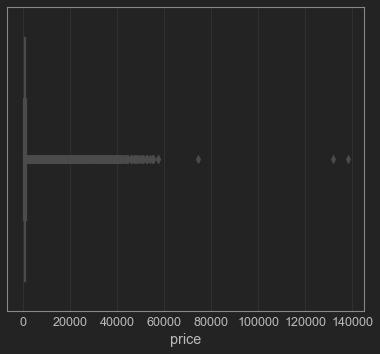

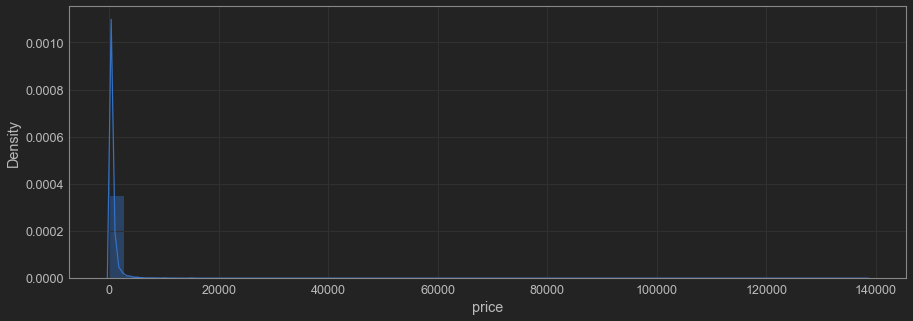

In [13]:
#antes da eliminação de outliers 
box_plot(base['price'])
histograma(base['price'])

In [14]:
base,linhas_removidas = tratar_outliers(base,'price')
print(linhas_removidas)

82154


C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


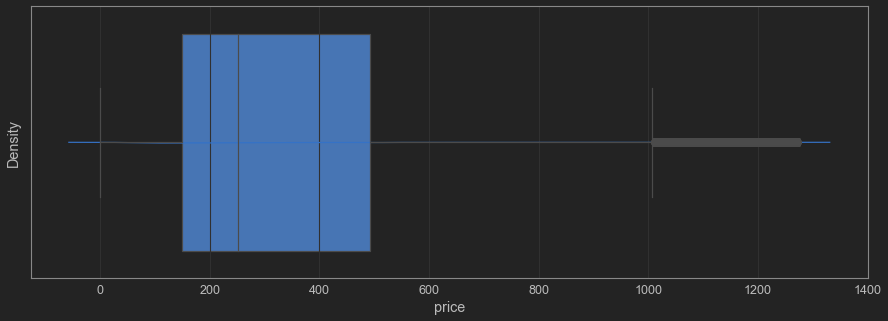

In [15]:
histograma(base['price'])
box_plot(base['price'])


### Extra_people

C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


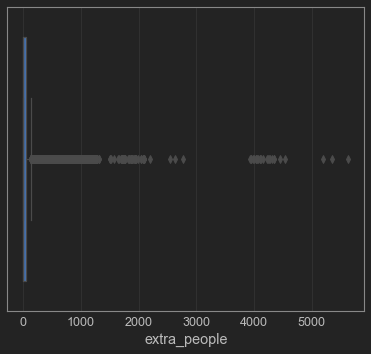

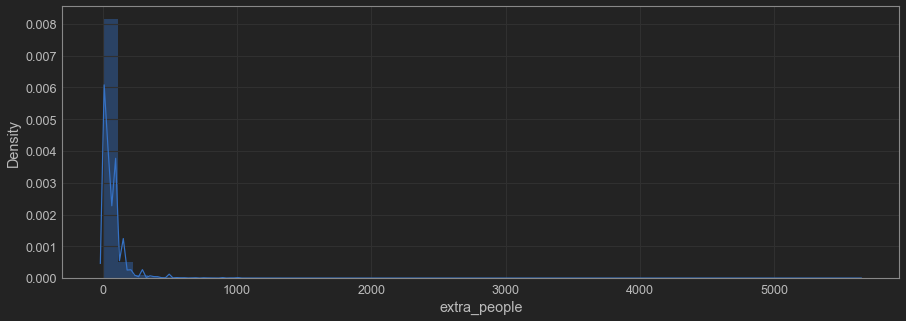

In [16]:
# extra_people
box_plot(base['extra_people'])
histograma(base['extra_people'])

55641


C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


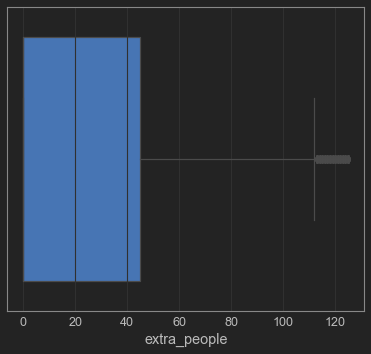

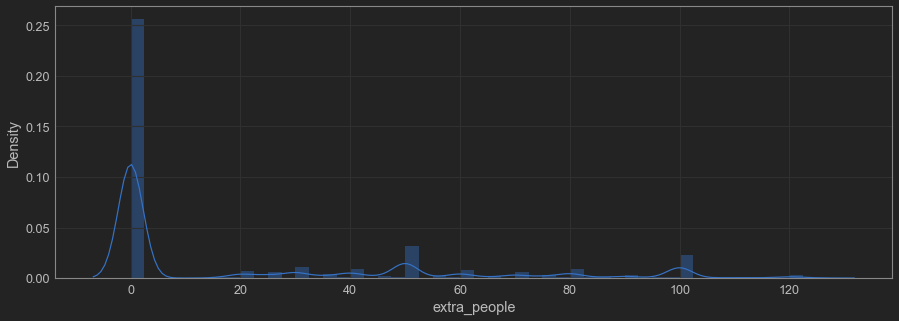

In [17]:
base,linhas_removidas = tratar_outliers(base,'extra_people')
print(linhas_removidas)
box_plot(base['extra_people'])
histograma(base['extra_people'])

### accommodates

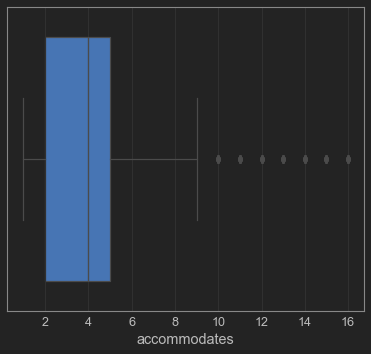

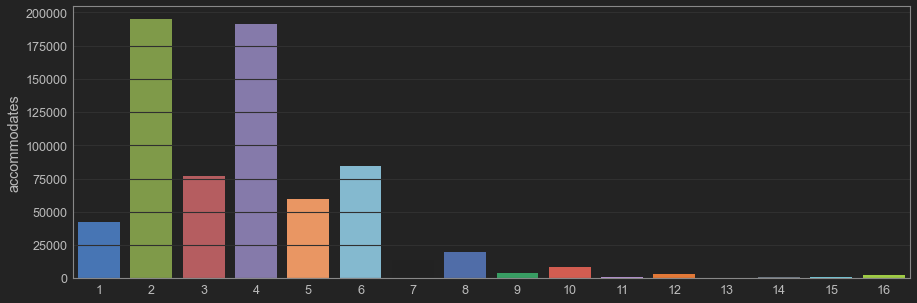

In [18]:
box_plot(base['accommodates'])
grafico_barra(base['accommodates'])

15711


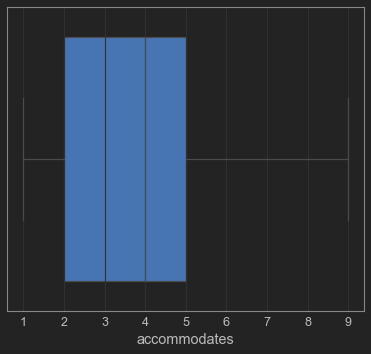

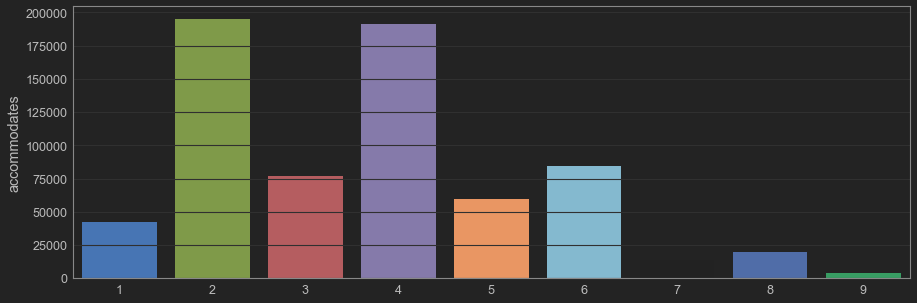

In [19]:
base,linhas_removidas = tratar_outliers(base,'accommodates')
print(linhas_removidas)
box_plot(base['accommodates'])
grafico_barra(base['accommodates'])

### bathrooms 

7575


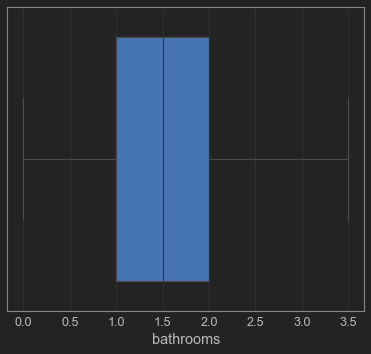

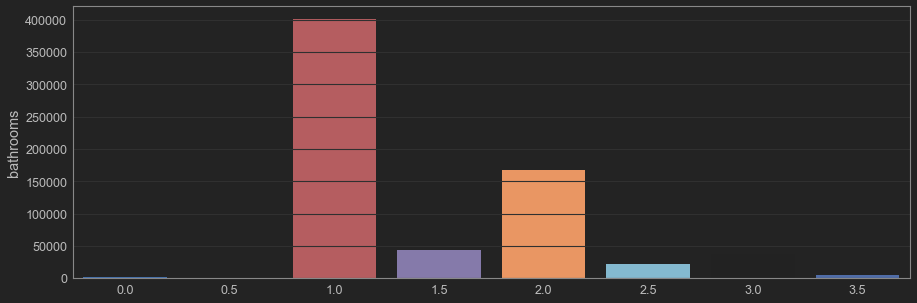

In [20]:
base,linhas_removidas = tratar_outliers(base,'bathrooms')
print(linhas_removidas)
box_plot(base['bathrooms'])
grafico_barra(base['bathrooms'])

### bedrooms

6231


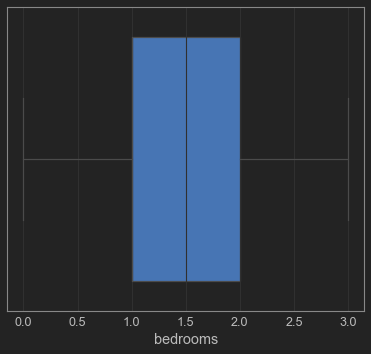

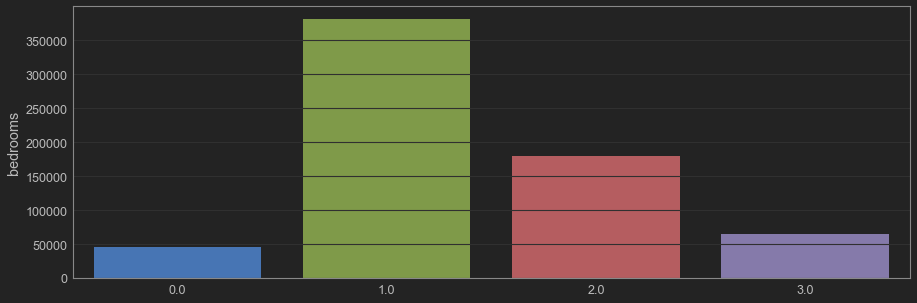

In [21]:
base,linhas_removidas = tratar_outliers(base,'bedrooms')
print(linhas_removidas)
box_plot(base['bedrooms'])
grafico_barra(base['bedrooms'])

### beds

6545


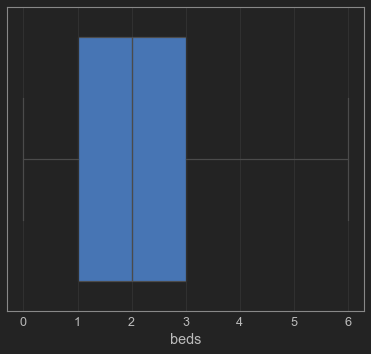

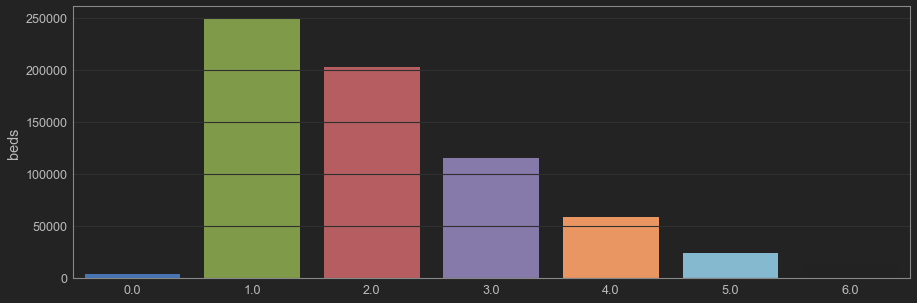

In [22]:
base,linhas_removidas = tratar_outliers(base,'beds')
print(linhas_removidas)
box_plot(base['beds'])
grafico_barra(base['beds'])

### guests_included  

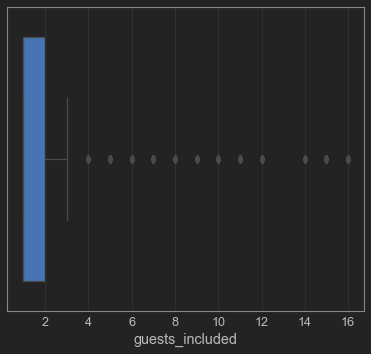

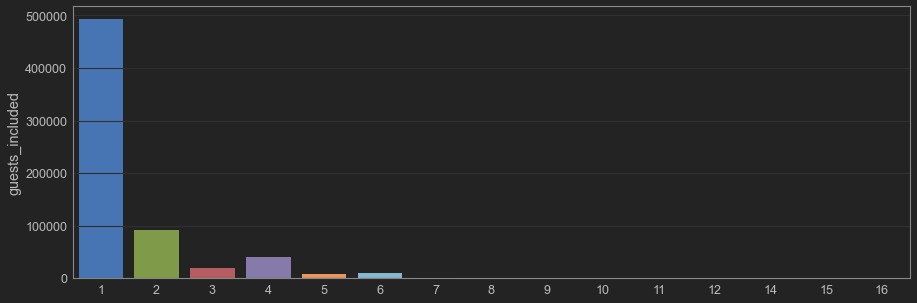

In [23]:
#removido
box_plot(base['guests_included'])
grafico_barra(base['guests_included'])
base = base.drop('guests_included',axis = 1)

### minimum_nights   

39410


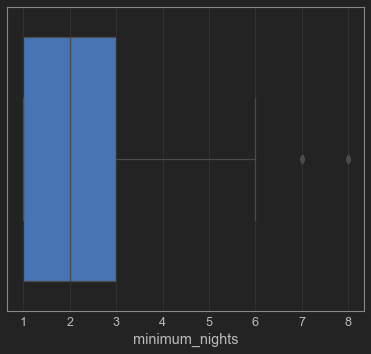

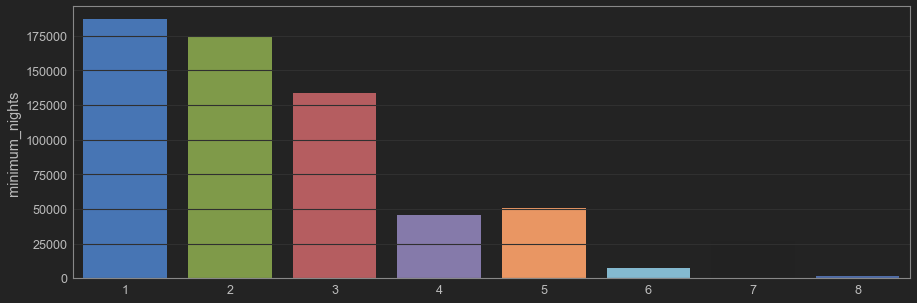

In [24]:
base,linhas_removidas = tratar_outliers(base,'minimum_nights')
print(linhas_removidas)
box_plot(base['minimum_nights'])
grafico_barra(base['minimum_nights'])

### maximum_nights

In [25]:
#removido
base = base.drop('maximum_nights',axis = 1)


### number_of_reviews 

In [26]:
#removido
base = base.drop('number_of_reviews',axis = 1)               

### property_type

Apartment                 502725
House                      43963
Condominium                28147
Serviced apartment         16635
Loft                       12721
Bed and breakfast           3972
Guest suite                 3763
Hostel                      3181
Other                       2196
Guesthouse                  2127
Villa                       1193
Aparthotel                  1183
Hotel                       1044
Townhouse                    931
Boutique hotel               513
Chalet                       445
Tiny house                   402
Earth house                  321
Casa particular (Cuba)       237
Bungalow                     198
Dorm                         164
Cottage                      159
Nature lodge                 110
Castle                       106
Cabin                         74
Island                        54
Boat                          51
Treehouse                     51
Campsite                      34
Resort                        26
Camper/RV 

C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_type', ylabel='count'>

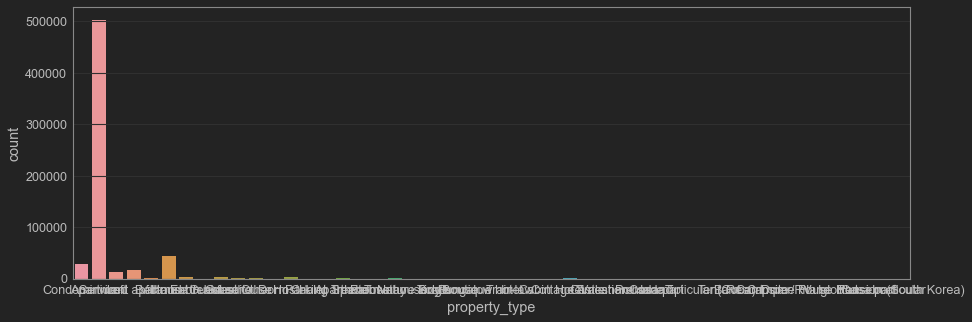

In [27]:
#property_type
print(base['property_type'].value_counts())

plt.figure(figsize = (15,5))
sns.countplot('property_type',data = base)


['Other', 'Guesthouse', 'Villa', 'Aparthotel', 'Hotel', 'Townhouse', 'Boutique hotel', 'Chalet', 'Tiny house', 'Earth house', 'Casa particular (Cuba)', 'Bungalow', 'Dorm', 'Cottage', 'Nature lodge', 'Castle', 'Cabin', 'Island', 'Boat', 'Treehouse', 'Campsite', 'Resort', 'Camper/RV', 'Tent', 'Tipi', 'Hut', 'Barn', 'Farm stay', 'Vacation home', 'Dome house', 'Parking Space', 'In-law', 'Igloo', 'Train', 'Pousada', 'Houseboat', 'Timeshare', 'Casa particular', 'Pension (South Korea)', 'Plane']
Apartment             502725
House                  43963
Condominium            28147
Serviced apartment     16635
Loft                   12721
Outros                 11772
Bed and breakfast       3972
Guest suite             3763
Hostel                  3181
Name: property_type, dtype: int64


C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_type', ylabel='count'>

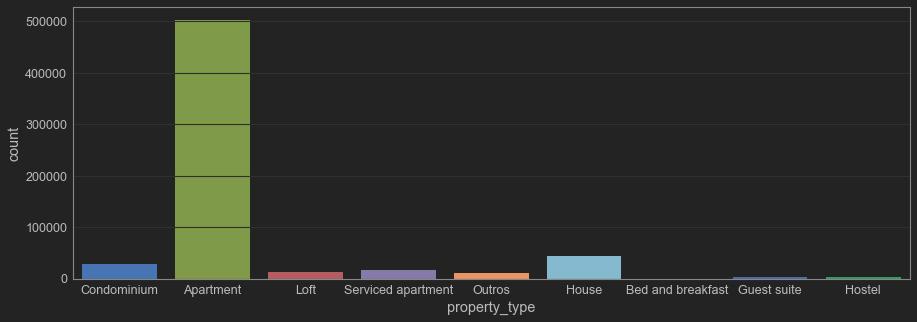

In [28]:
tabela_tipos_c = base['property_type'].value_counts()
colunas_agrupar = []
for tipo in tabela_tipos_c.index:
    if tabela_tipos_c[tipo] < 2500:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base.loc[base['property_type']==tipo,'property_type'] = 'Outros'
print(base['property_type'].value_counts())

plt.figure(figsize = (15,5))
sns.countplot('property_type',data = base)


### room_type

Entire home/apt    421881
Private room       191146
Shared room         12059
Hotel room           1793
Name: room_type, dtype: int64


C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

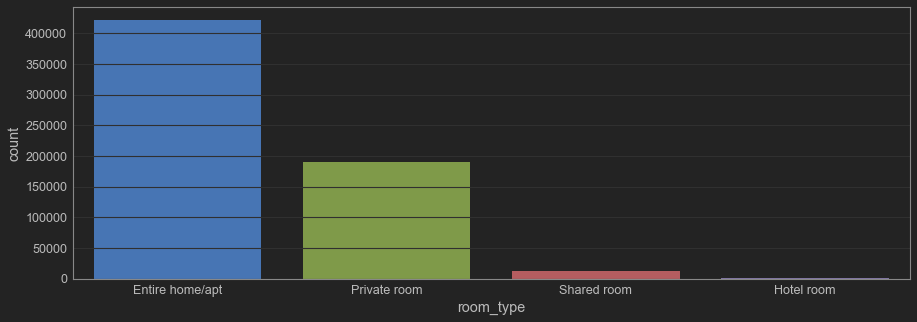

In [29]:
#room_type
print(base['room_type'].value_counts())

plt.figure(figsize = (15,5))
sns.countplot('room_type',data = base)

### bed_type

Real Bed         615992
Pull-out Sofa      7650
Futon              1625
Airbed             1092
Couch               520
Name: bed_type, dtype: int64


C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bed_type', ylabel='count'>

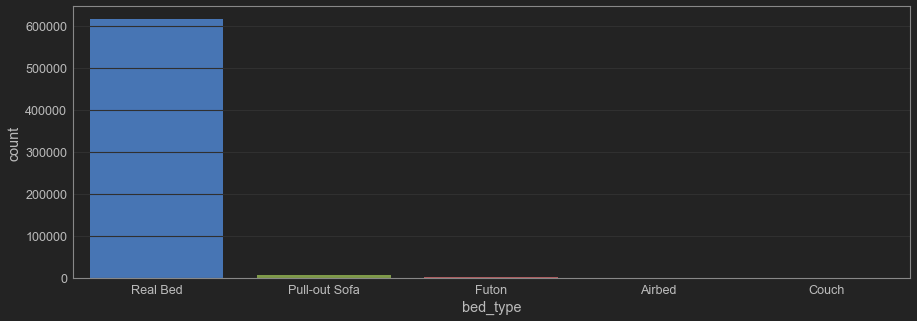

In [30]:
#bed_type
print(base['bed_type'].value_counts())

plt.figure(figsize = (15,5))
sns.countplot('bed_type',data = base)

### cancellation_policy

In [39]:

base.rename(columns={'host_identity_verified':'perfil_verificado','property_type':'tipo_propriedade','room_type':'tipo_quarto','accommodates':'acomodacoes','bathrooms':'banheiros','bedrooms':'quartos','beds':'camas','bed_type':'tipo_cama','price':'preco','extra_people':'pessoas_extra','minimum_nights':'noites_min','instant_bookable':'reserva_instantanea','is_business_travel_ready':'viagens_negocio','cancellation_policy':'cancelamento'},inplace = True)
display(base)

,perfil_verificado,neighbourhood,latitude,longitude,tipo_propriedade,tipo_quarto,acomodacoes,banheiros,quartos,camas,tipo_cama,preco,pessoas_extra,noites_min,reserva_instantanea,viagens_negocio,cancelamento,mes,ano,n_amenities
1,f,Copacabana,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,270.0,51.0,4,t,f,strict,4,2018,25
3,t,Copacabana,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,161.0,45.0,4,f,f,strict,4,2018,14
4,t,Ipanema,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,222.0,68.0,2,t,f,strict,4,2018,16
5,t,Ipanema,-22.988165,-43.193588,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,308.0,86.0,2,f,f,strict,4,2018,30
6,t,Copacabana,-22.981269,-43.190457,Loft,Entire home/apt,2,1.0,1.0,2.0,Real Bed,219.0,80.0,3,t,f,strict,4,2018,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,f,Barra da Tijuca,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,121.0,50.0,1,f,f,flexible,9,2019,18
34325,f,Barra da Tijuca,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,2.0,3.0,Real Bed,799.0,0.0,2,f,f,flexible,9,2019,12
34326,t,Copacabana,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,1.0,2.0,Real Bed,420.0,30.0,3,f,f,strict_14_with_grace_period,9,2019,9
34327,t,Barra da Tijuca,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,250.0,0.0,1,f,f,strict_14_with_grace_period,9,2019,25


flexible                       254593
strict_14_with_grace_period    236831
moderate                       115260
strict                          20195
Name: cancelamento, dtype: int64


C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancelamento', ylabel='count'>

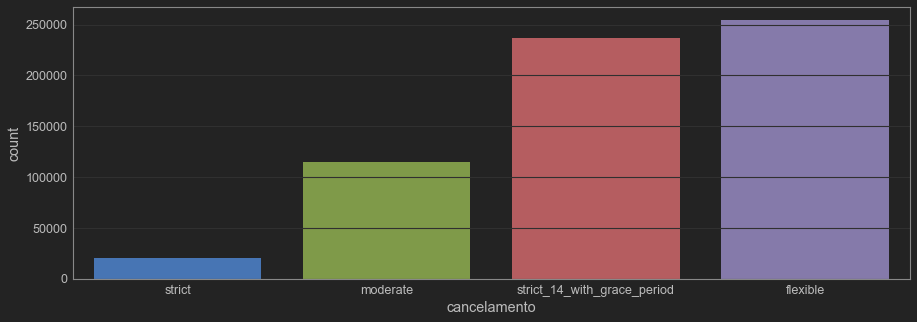

In [40]:
#cancellation_policy
print(base['cancelamento'].value_counts())

plt.figure(figsize = (15,5))
sns.countplot('cancelamento',data = base)

[]
flexible                       254593
strict_14_with_grace_period    236831
moderate                       115260
strict                          20195
Name: cancelamento, dtype: int64


C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancelamento', ylabel='count'>

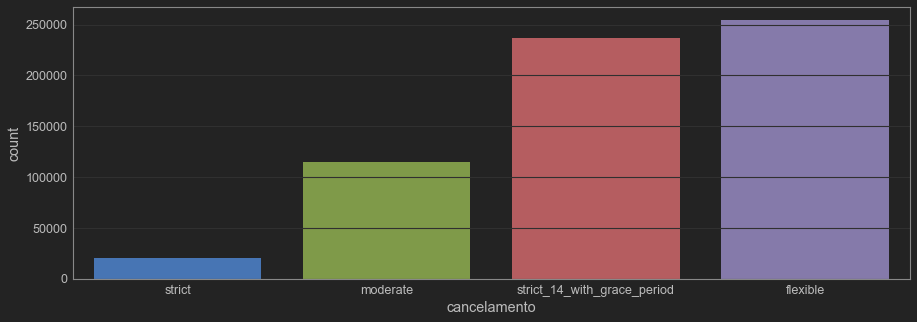

In [41]:
tabela_cancellation = base['cancelamento'].value_counts()
colunas_agrupar = []
for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo] < 12000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base.loc[base['cancelamento']==tipo,'cancelamento'] = 'strict'
print(base['cancelamento'].value_counts())

plt.figure(figsize = (15,5))
sns.countplot('cancelamento',data = base)


In [43]:
#amenities é um lista separada por virgula
#criar uma coluna com quantidades de amenities (generalizar)
# devido a diversidade do amenities  nesse projeto nao será utilazada!!!!!
#print(base['amenities'].iloc[0].split(','))
#print(len(base['amenities'].iloc[2].split(',')))

#base['n_amenities'] = base['amenities'].str.split(',').apply(len)
#base = base.drop('amenities',axis = 1)

KeyError: 'amenities'

18600


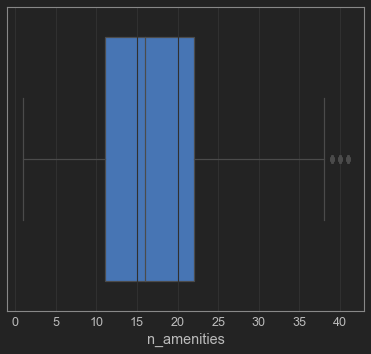

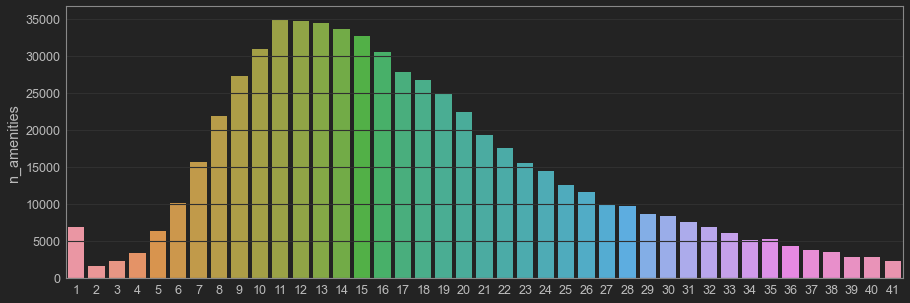

In [44]:
base,linhas_removidas = tratar_outliers(base,'n_amenities')
print(linhas_removidas)
box_plot(base['n_amenities'])
grafico_barra(base['n_amenities'])

# Encoding 
para previsão dos modelos teremos que transformar textos em numeros 
temos colunas de categorias( informações de texto) e verdadeiro ou falso
True or false = 1 e 0 
Textos = encoding de variaveis dummies


### True and false

In [45]:
colunas_tf = ['perfil_verificado','reserva_instantanea','viagens_negocio']
base_cod = base.copy()
for coluna in colunas_tf:
    base_cod.loc[base_cod[coluna]=='t',coluna] = 1
    base_cod.loc[base_cod[coluna]=='f',coluna] = 0
print(base_cod.iloc[0])

perfil_verificado                    0
neighbourhood               Copacabana
latitude                    -22.965919
longitude                   -43.178962
tipo_propriedade           Condominium
tipo_quarto            Entire home/apt
acomodacoes                          5
banheiros                          1.0
quartos                            2.0
camas                              2.0
tipo_cama                     Real Bed
preco                            270.0
pessoas_extra                     51.0
noites_min                           4
reserva_instantanea                  1
viagens_negocio                      0
cancelamento                    strict
mes                                  4
ano                               2018
n_amenities                         25
Name: 1, dtype: object


In [46]:
print(display(base_cod))

,perfil_verificado,neighbourhood,latitude,longitude,tipo_propriedade,tipo_quarto,acomodacoes,banheiros,quartos,camas,tipo_cama,preco,pessoas_extra,noites_min,reserva_instantanea,viagens_negocio,cancelamento,mes,ano,n_amenities
1,0,Copacabana,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,270.0,51.0,4,1,0,strict,4,2018,25
3,1,Copacabana,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,161.0,45.0,4,0,0,strict,4,2018,14
4,1,Ipanema,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,222.0,68.0,2,1,0,strict,4,2018,16
5,1,Ipanema,-22.988165,-43.193588,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,308.0,86.0,2,0,0,strict,4,2018,30
6,1,Copacabana,-22.981269,-43.190457,Loft,Entire home/apt,2,1.0,1.0,2.0,Real Bed,219.0,80.0,3,1,0,strict,4,2018,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,0,Barra da Tijuca,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,121.0,50.0,1,0,0,flexible,9,2019,18
34325,0,Barra da Tijuca,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,2.0,3.0,Real Bed,799.0,0.0,2,0,0,flexible,9,2019,12
34326,1,Copacabana,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,1.0,2.0,Real Bed,420.0,30.0,3,0,0,strict_14_with_grace_period,9,2019,9
34327,1,Barra da Tijuca,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,250.0,0.0,1,0,0,strict_14_with_grace_period,9,2019,25


None


### Categorias

In [47]:
colunas_categorias = ['tipo_propriedade', 'tipo_quarto', 'tipo_cama', 'cancelamento']
base_cod = pd.get_dummies(data = base_cod,columns = colunas_categorias)

base_cod = base_cod.drop('neighbourhood',axis = 1)



display(base_cod.head())



,perfil_verificado,latitude,longitude,acomodacoes,banheiros,quartos,camas,preco,pessoas_extra,noites_min,...,tipo_quarto_Shared room,tipo_cama_Airbed,tipo_cama_Couch,tipo_cama_Futon,tipo_cama_Pull-out Sofa,tipo_cama_Real Bed,cancelamento_flexible,cancelamento_moderate,cancelamento_strict,cancelamento_strict_14_with_grace_period
1,0,-22.965919,-43.178962,5,1.0,2.0,2.0,270.0,51.0,4,...,0,0,0,0,0,1,0,0,1,0
3,1,-22.977117,-43.190454,3,1.0,1.0,2.0,161.0,45.0,4,...,0,0,0,0,0,1,0,0,1,0
4,1,-22.983024,-43.214270,3,1.0,1.0,2.0,222.0,68.0,2,...,0,0,0,0,0,1,0,0,1,0
5,1,-22.988165,-43.193588,3,1.5,1.0,2.0,308.0,86.0,2,...,0,0,0,0,0,1,0,0,1,0
6,1,-22.981269,-43.190457,2,1.0,1.0,2.0,219.0,80.0,3,...,0,0,0,0,0,1,0,0,1,0


# Modelo de previsão

### Qual melhor modelo

In [48]:

#funcao metodo de avaliacao r2 e rsme
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 =r2_score(y_test,previsao)
    rsme = np.sqrt(mean_squared_error(y_teste,previsao))
    return f'{nome_modelo}===== valor r2: {r2},====valor rsme{rsme}'

escolha dos modelos e separaçao das variaveis 
-random forest
-linear regression
-extra tree

In [50]:
modelo_lr = LinearRegression()
modelo_rf = RandomForestRegressor()
modelo_et = ExtraTreesRegressor()

modelos = {'RadomForest':modelo_rf,
          'LinearRegression':modelo_lr,
          'ExtraTrees':modelo_et,}

y = base_cod['preco']
x = base_cod.drop('preco',axis = 1)

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 10 )

for nome_modelo,modelo in modelos.items():
    #treinar
    modelo.fit(x_train, y_train)
    #testar
    previsao = modelo.predict(x_test)
    
    print(avaliar_modelo(nome_modelo,y_test,previsao))
    

RadomForest===== valor r2: 0.9668364082528756,====valor rsme47.62231887005526
LinearRegression===== valor r2: 0.3235297488272284,====valor rsme215.08202159266082
ExtraTrees===== valor r2: 0.9691960263836285,====valor rsme45.89687641226177


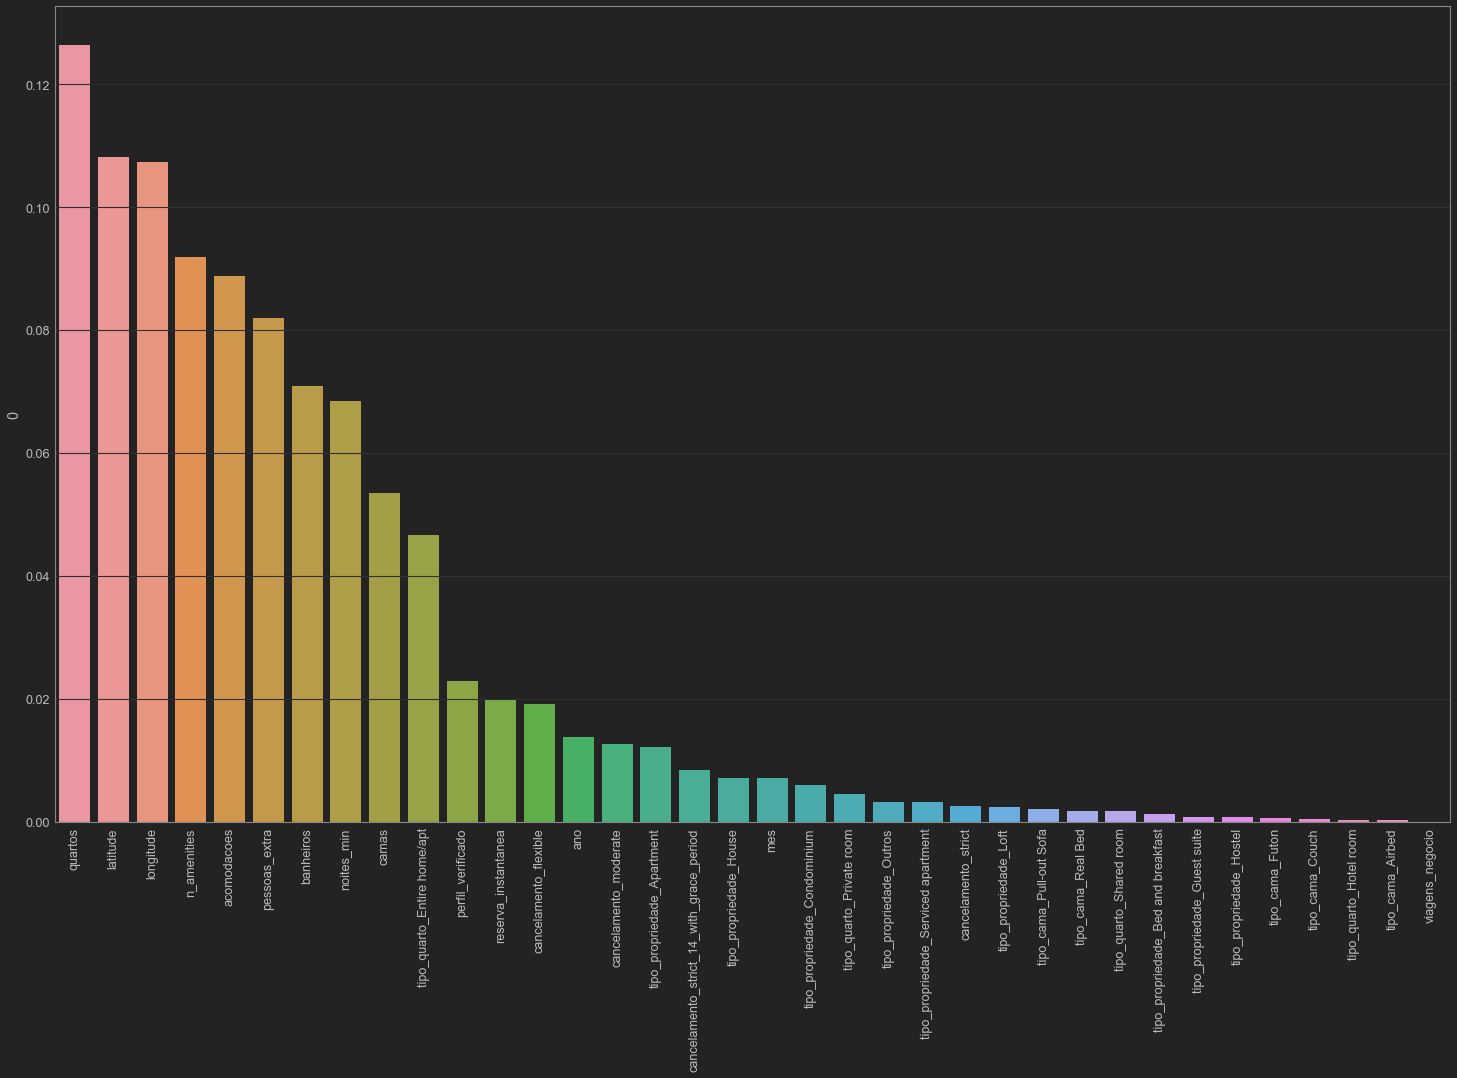

In [57]:
#print(modelo_et.feature_importances_)
#print(x_train.columns)
importancia = pd.DataFrame(modelo_et.feature_importances_, x_train.columns)
importancia = importancia.sort_values(by = 0, ascending = False)

plt.figure(figsize=(25,15))
ax = sns.barplot(x=importancia.index,y=importancia[0])
ax.tick_params(axis = 'x',rotation = 90)

# qual combinaçao mais importante para o preço 


In [56]:
display(importancia)


,0
quartos,0.126355
latitude,0.108127
longitude,0.107376
n_amenities,0.091905
acomodacoes,0.088766
pessoas_extra,0.081931
banheiros,0.070963
noites_min,0.068501
camas,0.053564
tipo_quarto_Entire home/apt,0.046684


   Com o modelo de previsão é possivel identificar  os fatores que mais impactam no valor do aluguel de um imovél.